In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Yash-Angelique/Desktop/2020/superstore.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


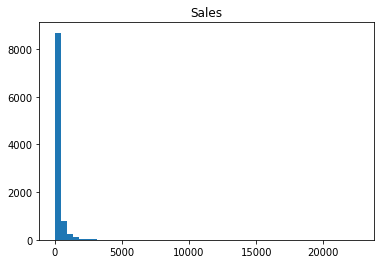

In [4]:
plt.hist(df['Sales'],50)
plt.title("Sales")
plt.show()

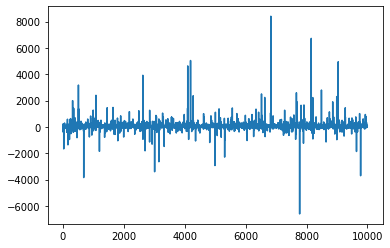

In [5]:
plt.plot(df['Profit'])
plt.show()

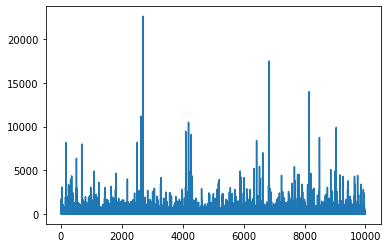

In [6]:
# a line plot displays information as a series of data points
df['Sales'].plot(kind='line')
plt.show()

In [7]:
df[['Order Date','Sales']]

,Order Date,Sales
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,6/12/2016,14.6200
3,10/11/2015,957.5775
4,10/11/2015,22.3680
...,...,...
9989,1/21/2014,25.2480
9990,2/26/2017,91.9600
9991,2/26/2017,258.5760
9992,2/26/2017,29.6000


In [8]:
df['Order Date']=pd.to_datetime(df['Order Date']).dt.to_period('Y')

In [9]:
df['Order Date']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Order Date, Length: 9994, dtype: period[A-DEC]

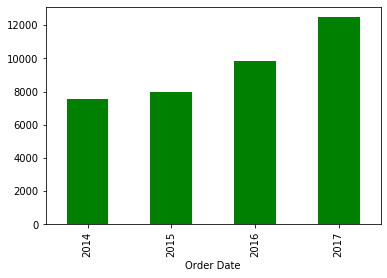

In [10]:
df_order_year= df.groupby('Order Date').Quantity.agg('sum')
df_order_year.plot(x='Order Date', y='Quantity',kind='bar',color='green')
plt.show()

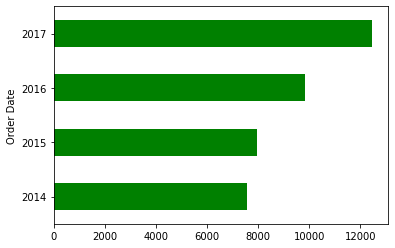

In [11]:
#df.sort_values(['Quantity'],ascending=True,axis=0, inplace=True)
#df.sort_values('Quantity')
df_order_year= df.groupby('Order Date').Quantity.agg('sum')
df_order_year.plot(x='Order Date', y='Quantity',kind='barh',color='green')
#sns.barplot(x='Order Date', y='Quantity',data=df, order=df.sort_values('Quantity',ascending=False).Order Date)
plt.show()

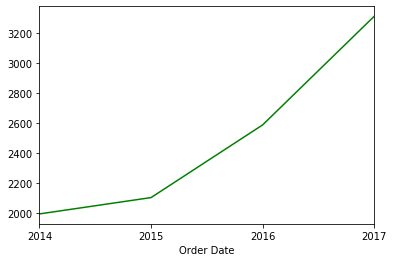

In [12]:
df_order_year= df.groupby('Order Date').Sales.agg('count')
df_order_year.plot(x='Order Date', y='Sales',kind='line',color="green")

plt.show()

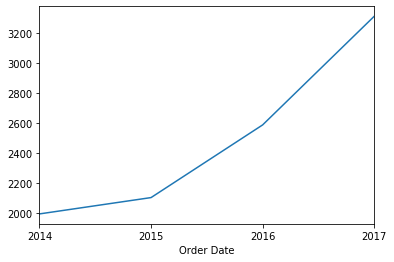

In [13]:
df_order_year= df.groupby('Order Date').Sales.agg('count')
df_order_year.plot(x='Order Date', y='Sales',kind='line')
plt.show()

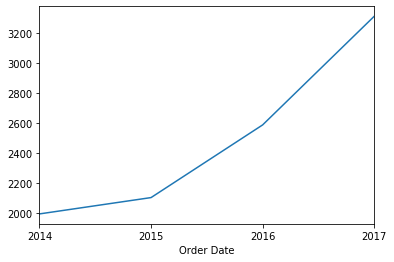

In [14]:
df_order_year= df.groupby('Order Date').Sales.agg('count')
df_order_year.plot(x='Order Date', y='Sales',kind='line')
plt.show()

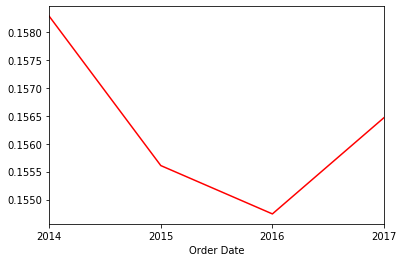

In [15]:
df_order_year= df.groupby('Order Date').Discount.agg('mean')
df_order_year.plot(x='Order Date', y='Discount',kind='line',color="red")
plt.show()

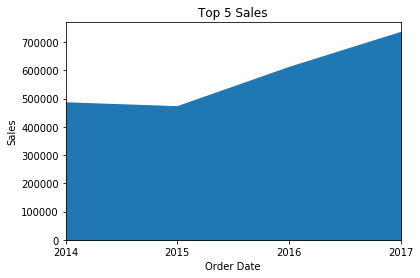

In [16]:
df.sort_values(['Sales'],ascending=False,axis=0, inplace=True)
df_top5 = df.head()

df_top5= df.groupby('Order Date').Sales.agg('sum')
df_top5.plot(x='Order Date', y='Sales',kind='area')
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Top 5 Sales")
plt.show()

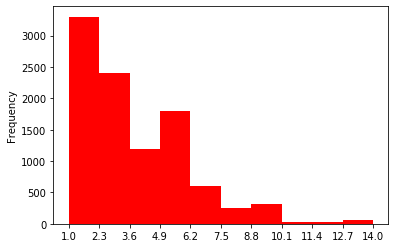

In [17]:
#a histogram is. A histogram is a way of representing the frequency distribution of a numeric dataset
count,bin_edges=np.histogram(df['Quantity'])
df['Quantity'].plot(kind="hist",color='red',xticks=bin_edges)
plt.show()

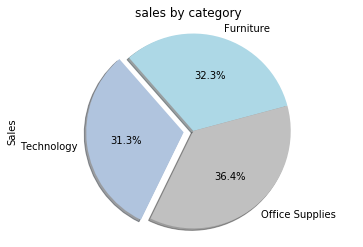

In [18]:
df_category= df.groupby('Category',axis=0).sum()
my_labels=['Furniture','Technology','Office Supplies']
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0, 0.1, 0)
df_category['Sales'].plot(kind='pie',labels=my_labels,autopct='%1.1f%%', startangle=15,shadow = True, colors=my_colors, explode=my_explode)
plt.axis('equal')
plt.title('sales by category')
plt.show()

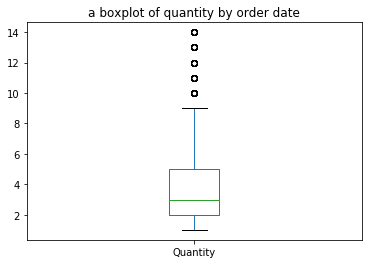

In [19]:
df_us=df[['Order Date','Quantity']]
df_us.plot(kind='box')
plt.title('a boxplot of quantity by order date')
plt.show()

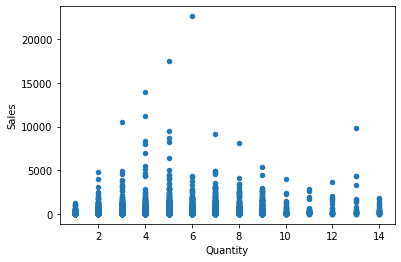

In [20]:
df.plot(kind='scatter', x='Quantity' ,y='Sales')
plt.show()

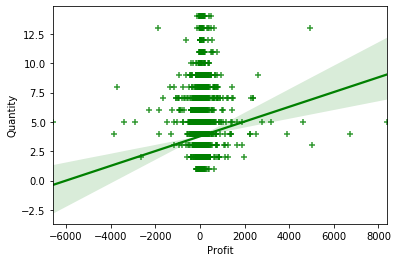

In [21]:
#regression plot with seaborn
s=sns.regplot(x='Profit',y='Quantity',data=df,color='green',marker='+')

In [31]:
#!pip install folium
import folium
from IPython.display import display
us_map=folium.Map(location=[37.090,-95.71],zoom_start=12)
#display(us_map)

